# Gaussian Kernel Regression

La regresión kernel gausiana se comporta de manera análoga al regresor mediante la técnica de los $k$ vecinos pero incluyendo las siguientes diferencias:

1. La regresión kernel gausiana toma una media ponderada de las muestras cercanas en base a una distribución gausiana.
2. La regresión kernel usa todas las muestras del conjunto como vecinos ($k$ = número de muestras).

Conceptualmente lo que hace la regresión kernel gausiana es determinar el peso de cada muestra del conjunto de datos ($x^\prime$) en la predicción en función de su valor asociado a una distribución gausiana de media igual al punto a predecir ($x$) y desviación típica $\alpha$. Dicho $\alpha$ se identificará como un hiper-parámetro del regresor.

Ilustremos esto gráficamente. Supongamos la siguiente distribución normal de media 0 y desviación típica 1:

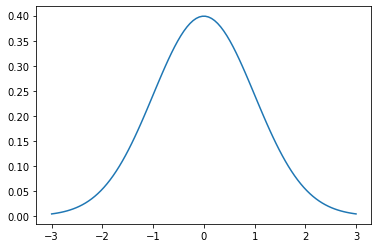

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-3, +3, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Si estamos prediciendo el valor para $x=0$ entonces los puntos cuyo valor $x$ sea cercano a 1 tendrán un peso en la predicción de aproximadamente 0.2, los puntos cuyo valor $x$ tendrán un peso de aproximadamente 0.05 y así sucesivamente.

Nótese la enorme influencia del hiper-parámetro $\alpha$ en este proceso. Si hacemos el valor de $\alpha$ muy cercano a 0 obtenemos la siguiente distribución normal:

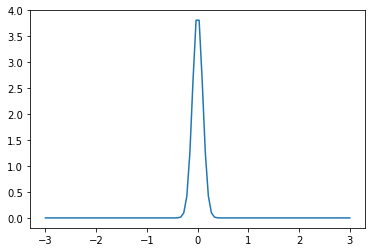

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 0.01
sigma = math.sqrt(variance)
x = np.linspace(-3, +3, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Lo que provoca que únicamente los puntos muy cercanos a 0 tengan influencia sobre sus predicciones.

Por el contrario, para valores grandes de $\alpha$ obtenemos esta distribución normal:

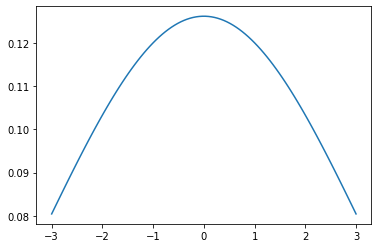

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(-3, +3, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

Que atendiendo a la escala del eje *y* puede verse que todos los puntos tendrían, aproximadamente, la misma influencia en la predicción.

Este método de regresión se encuentra implementado en la clase [`sklearn.gaussian_process.GaussianProcessRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html) de la librería `sklearn`. Su constructor dispone del parámetro `alpha` cuya utilidad se ha descrito anteriormente.

Veamos su funcionamiento sobre un conjunto de datos sintéticos.

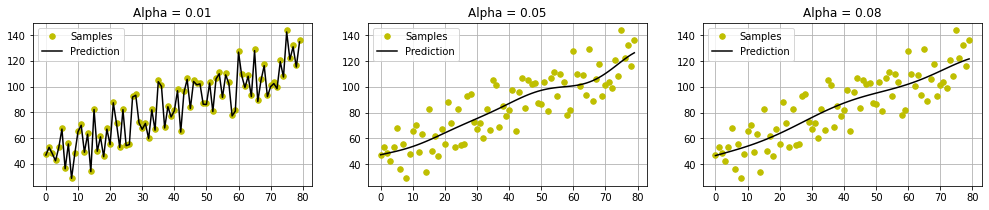

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import random

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

y = []
X = np.array(list(range(80)))[:, np.newaxis]
for i in range(len(X)):
    y.append(20+X[i]+random.random()*50)

kernel = RBF(10, (0.01, 1e2))

fig, axs = plt.subplots(1,3, figsize=(17,3))
for i, alpha in zip([0,1,2], [0.01, 0.05, 0.08]):
    gp = GaussianProcessRegressor(alpha=alpha, kernel=kernel)
    gp.fit(X, y)
    y_pred, sigma = gp.predict(X, return_std=True)

    axs[i].plot(X, y, 'y.', markersize=11, label='Samples')
    axs[i].plot(X, y_pred, 'k-', label='Prediction')
    axs[i].legend()
    axs[i].set_title('Alpha = ' + str(alpha))
    axs[i].grid()
plt.show()

Nótese que hemos necesitado también definir el parámetro `kernel` que indica la función de convarianzas empleada por el método. En este caso hemos usado [`sklearn.gaussian_process.kernels.RBF`](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html) y ajustado sus valores a los datos del ejemplo.